# Individual Porject
# Formal modelling and statistical analysis of TOR

### Author: Leonidas Reppas
### Supervisor: Gethin Norman

#### Libraries:

In [18]:
import random
import matplotlib.pyplot as plt
import math
import numpy as np
import datetime

#### Relay statistics for the TOR network for 2009 (gathered from tor metrics):
* Roughly 1500 relays
* 625 exit relays
* less than 500,000 users

In [2]:
# Network setup / Relay creation

total_nodes = 0
non_exit_nodes = 0
exit_nodes = 0

class Relays():
    '''
    This class deals with the creation of relay types
    '''
    
    def create_non_exit_nodes(self, number):
        global non_exit_nodes
        non_exit_nodes += number
        
    def create_exit_nodes(self, number):
        global exit_nodes
        exit_nodes += number
        
    def calculate_total_nodes(self):
        global non_exit_nodes, exit_nodes, total_nodes
        total_nodes = exit_nodes + non_exit_nodes
        
    def print_nodes(self):
        global non_exit_nodes, exit_nodes, total_nodes
        print("""
        Number of non-exit nodes: {},
        Number of exit nodes: {},\n
        Number of total nodes in the network: {}
        """.format(non_exit_nodes, exit_nodes, total_nodes))
        
# Testing
relay = Relays()
relay.create_non_exit_nodes(875)
relay.create_exit_nodes(625)
relay.calculate_total_nodes()
relay.print_nodes()


        Number of non-exit nodes: 875,
        Number of exit nodes: 625,

        Number of total nodes in the network: 1500
        


#### Path selection algorithm implemented:
* Uniformly random, with no use of guard nodes. 
This is how Tor worked before 2004. The random choice lead to terrible bandwidth bottlenecks. Without the use of guard nodes,
every circuit had a probability to be compromised of (M/N)^2, where M is the amount of attacker controlled network resource
and N is the total network resource.

In [22]:
# Path Selection Algorithm
class TorPath():
    '''
    This class deals with the probabilistic path selection 
    algorithm for the different user models previously defined
    '''
    
    def select_path_typical(self):
        # first the exit node is selected
        # 91.5% of the exit flagged nodes
        # accept the ports of a typical user
        global exit_nodes, non_exit_nodes
        available_exit_nodes = exit_nodes * 0.92
        
    
        exit_choice = random.randrange(non_exit_nodes, non_exit_nodes + available_exit_nodes)
        middle_choice = random.randrange(1, non_exit_nodes)
        entry_choice = random.randrange(1, non_exit_nodes)
            
        # make sure no node is selected twice
        while (entry_choice == middle_choice):
            entry_choice = random.randrange(1, non_exit_nodes)
            
        return (entry_choice, middle_choice, exit_choice)
            
    def select_path_irc(self):
        global exit_nodes, non_exit_nodes
        available_exit_nodes = exit_nodes * 0.8
        
        exit_choice = random.randrange(non_exit_nodes, non_exit_nodes + available_exit_nodes)
        middle_choice = random.randrange(1, non_exit_nodes)
        entry_choice = random.randrange(1, non_exit_nodes)
            
        while (entry_choice == middle_choice):
            entry_choice = random.randrange(1, non_exit_nodes)
            
        return (entry_choice, middle_choice, exit_choice)
            
    def select_path_bittorrent(self):
        global exit_nodes, non_exit_nodes
        available_exit_nodes = exit_nodes * 0.2
        
        exit_choice = random.randrange(non_exit_nodes, non_exit_nodes + available_exit_nodes)
        middle_choice = random.randrange(1, non_exit_nodes)
        entry_choice = random.randrange(1, non_exit_nodes)
            
        while (entry_choice == middle_choice):
            entry_choice = random.randrange(1, non_exit_nodes)
            
        return (entry_choice, middle_choice, exit_choice)
    
    def attack_path(self, entry_choice, middle_choice, exit_choice):
        partial_compr = False
        complete_compr = False
    
        if entry_choice == 1 or exit_choice == 1:
            partial_compr = True
        
        if entry_choice == 1 and exit_choice == 1:
            complete_compr = True
        
        return (partial_compr, complete_compr)
        
        
torpath = TorPath()

In [33]:
# Experiements - 6 month period simulations

typ_partial1 = 0
typ_compl1 = 0
for i in range(68432):
    entry_choice, middle_choice, exit_choice = torpath.select_path_typical()
    partial, compl = torpath.attack_path(entry_choice, middle_choice, exit_choice)
    if partial: typ_partial1 += 1
    if compl: typ_compl1 += 1
    
irc_partial1 = 0
irc_compl = 0
for i in range(3510):
    entry_choice, middle_choice, exit_choice = torpath.select_path_irc()
    partial, compl = torpath.attack_path(entry_choice, middle_choice, exit_choice)
    if partial: irc_partial1 += 1
    if compl: irc_compl += 1

bit_partial1 = 0
bit_compl1 = 0
for i in range(175968):
    entry_choice, middle_choice, exit_choice = torpath.select_path_bittorrent()
    partial, compl = torpath.attack_path(entry_choice, middle_choice, exit_choice)
    if partial: bit_partial1 += 1
    if compl: bit_compl1 += 1


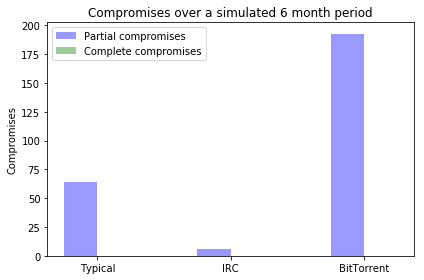

In [34]:
partial_compr_values = (typ_partial1, irc_partial1, bit_partial1)
compl_compr_values = (typ_compl1, irc_compl, bit_compl1)

fig, ax = plt.subplots()
n_groups = 3
bar_width = 0.25
index = np.arange(n_groups)
opacity = 0.4

rects1 = ax.bar(index, partial_compr_values, bar_width,
                alpha=opacity, color='b',
                label='Partial compromises')

rects2 = ax.bar(index + bar_width, compl_compr_values, bar_width,
                alpha=opacity, color='g',
                label='Complete compromises')


ax.set_ylabel('Compromises')
ax.set_title('Compromises over a simulated 6 month period')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('Typical', 'IRC', 'BitTorrent'))
ax.legend()

fig.tight_layout()
plt.show()

In [32]:
# 12 month period simulations

typ_partial2 = 0
typ_compl2 = 0
for i in range(136864):
    entry_choice, middle_choice, exit_choice = torpath.select_path_typical()
    partial, compl = torpath.attack_path(entry_choice, middle_choice, exit_choice)
    if partial: typ_partial2 += 1
    if compl: typ_compl2 += 1
    
irc_partial2 = 0
irc_compl2 = 0
for i in range(7020):
    entry_choice, middle_choice, exit_choice = torpath.select_path_irc()
    partial, compl = torpath.attack_path(entry_choice, middle_choice, exit_choice)
    if partial: irc_partial2 += 1
    if compl: irc_comp2 += 1
    
bit_partial2 = 0
bit_compl2 = 0
for i in range(351936):
    entry_choice, middle_choice, exit_choice = torpath.select_path_bittorrent()
    partial, compl = torpath.attack_path(entry_choice, middle_choice, exit_choice)
    if partial: bit_partial2 += 1
    if compl: bit_compl2 += 1

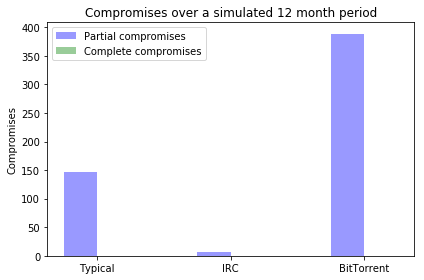

In [35]:
partial_compr_values = (typ_partial2, irc_partial2, bit_partial2)
compl_compr_values = (typ_compl2, irc_compl2, bit_compl2)

fig, ax = plt.subplots()
n_groups = 3
bar_width = 0.25
index = np.arange(n_groups)
opacity = 0.4

rects1 = ax.bar(index, partial_compr_values, bar_width,
                alpha=opacity, color='b',
                label='Partial compromises')

rects2 = ax.bar(index + bar_width, compl_compr_values, bar_width,
                alpha=opacity, color='g',
                label='Complete compromises')


ax.set_ylabel('Compromises')
ax.set_title('Compromises over a simulated 12 month period')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('Typical', 'IRC', 'BitTorrent'))
ax.legend()

fig.tight_layout()
plt.show()

In [31]:
# 24 month period simulations

typ_partial3 = 0
typ_compl3 = 0
for i in range(273728):
    entry_choice, middle_choice, exit_choice = torpath.select_path_typical()
    partial, compl = torpath.attack_path(entry_choice, middle_choice, exit_choice)
    if partial: typ_partial3 += 1
    if compl: typ_compl3 += 1
    
irc_partial3 = 0
irc_compl3 = 0
for i in range(14040):
    entry_choice, middle_choice, exit_choice = torpath.select_path_irc()
    partial, compl = torpath.attack_path(entry_choice, middle_choice, exit_choice)
    if partial: irc_partial3 += 1
    if compl: irc_comp3 += 1
    
bit_partial3 = 0
bit_compl3 = 0
for i in range(703872):
    entry_choice, middle_choice, exit_choice = torpath.select_path_bittorrent()
    partial, compl = torpath.attack_path(entry_choice, middle_choice, exit_choice)
    if partial: bit_partial3 += 1
    if compl: bit_compl3 += 1

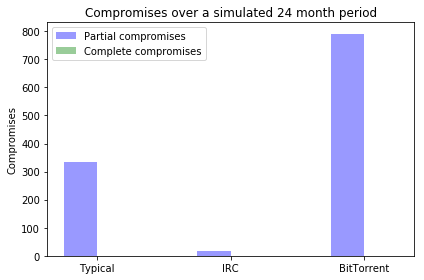

In [36]:
partial_compr_values = (typ_partial3, irc_partial3, bit_partial3)
compl_compr_values = (typ_compl3, irc_compl3, bit_compl3)

fig, ax = plt.subplots()
n_groups = 3
bar_width = 0.25
index = np.arange(n_groups)
opacity = 0.4

rects1 = ax.bar(index, partial_compr_values, bar_width,
                alpha=opacity, color='b',
                label='Partial compromises')

rects2 = ax.bar(index + bar_width, compl_compr_values, bar_width,
                alpha=opacity, color='g',
                label='Complete compromises')


ax.set_ylabel('Compromises')
ax.set_title('Compromises over a simulated 24 month period')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('Typical', 'IRC', 'BitTorrent'))
ax.legend()

fig.tight_layout()
plt.show()